### Load Datasets

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("Train_Test_Network.csv")
dataset = dataset.sample(frac = 1)
dataset = dataset.iloc[:100000, :]
dataset

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
229742,1556203866,192.168.1.30,39794,192.168.1.184,443,tcp,-,60.778143,0,0,...,0,0,-,-,-,-,-,-,1,ddos
147554,1554320432,192.168.1.152,54581,192.168.1.190,53,udp,dns,0.000046,130,0,...,0,0,-,-,-,-,-,-,0,normal
135280,1554310271,192.168.1.152,50853,192.168.1.190,53,udp,dns,0.000034,130,0,...,0,0,-,-,-,-,-,-,0,normal
80601,1554274212,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
325675,1556287936,192.168.1.195,54843,192.168.1.79,9197,tcp,http,0.558475,692,29310,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194361,1556172717,192.168.1.30,53282,192.168.1.152,80,tcp,http,0.258539,233,3440,...,0,0,-,-,-,-,-,-,1,injection
99675,1554285315,192.168.1.6,5353,224.0.0.251,5353,udp,dns,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
130146,1554306064,192.168.1.152,53972,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
99329,1554285124,192.168.1.190,43530,192.168.1.190,7878,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal


In [2]:
dataset.tail(30)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
205697,1556173428,192.168.1.31,43456,192.168.1.195,80,tcp,http,0.161774,256,524,...,0,0,-,-,-,-,-,-,1,injection
57612,1554260389,192.168.1.152,1880,192.168.1.152,40688,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
156044,1556021528,192.168.1.30,62946,192.168.1.186,2034,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,scanning
323334,1556287510,192.168.1.31,50192,192.168.1.190,80,tcp,http,0.001890,167,2875,...,0,0,-,-,-,-,-,-,1,password
133371,1554308812,192.168.1.190,3,205.251.194.167,3,icmp,-,0.000122,486,0,...,0,0,-,-,-,-,-,-,0,normal
279542,1556260880,192.168.1.190,21682,199.212.0.63,53,udp,dns,0.242148,56,323,...,0,0,-,-,-,-,-,-,0,normal
288871,1556261145,79.77.24.51,27271,192.168.1.194,80,tcp,-,10.637591,0,0,...,0,0,-,-,-,-,-,-,0,normal
214371,1556203776,192.168.1.30,53524,192.168.1.190,80,tcp,-,32.064741,0,0,...,0,0,-,-,-,-,-,-,1,ddos
34004,1554239694,127.0.0.1,42100,127.0.0.1,7878,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
162395,1556021731,192.168.1.32,54774,192.168.1.49,56738,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,scanning


In [3]:
dataset['type'].nunique()

10

In [4]:
dataset.shape

(100000, 45)

In [5]:
# list all dataset columns
print("Full Dataset Columns", dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column",
      dataset['type'].unique(), sep='\n')

Full Dataset Columns
Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

Unique values in the 'category' column
['ddos' 'normal' 'xss' 'ransomware' 'scanning' 'password' 'backdoor'
 'injection' 'dos' 'mitm']


### Feature Extraction

In [6]:
# the features I want to use for prototyping
trial_features = ['proto', 'duration', 'src_bytes', 'dst_bytes',
                  'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes',
                  'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype',
                  'dns_rcode', 'type']

subset_dataset =  dataset[trial_features]
print(subset_dataset)

       proto   duration  src_bytes  dst_bytes conn_state  missed_bytes  \
229742   tcp  60.778143          0          0         S3             0   
147554   udp   0.000046        130          0         S0             0   
135280   udp   0.000034        130          0         S0             0   
80601    tcp   0.000000          0          0        OTH             0   
325675   tcp   0.558475        692      29310         SF             0   
...      ...        ...        ...        ...        ...           ...   
194361   tcp   0.258539        233       3440         SF             0   
99675    udp   0.000000          0          0         S0             0   
130146   tcp   0.000000          0          0        OTH             0   
99329    tcp   0.000000          0          0        OTH             0   
358353   tcp  79.151874       1495          0         S2             0   

        src_pkts  src_ip_bytes  dst_pkts  dst_ip_bytes  dns_qclass  dns_qtype  \
229742         1            52

type
normal        65195
xss            4362
ddos           4351
ransomware     4335
dos            4324
password       4320
injection      4318
backdoor       4301
scanning       4247
mitm            247
Name: count, dtype: int64


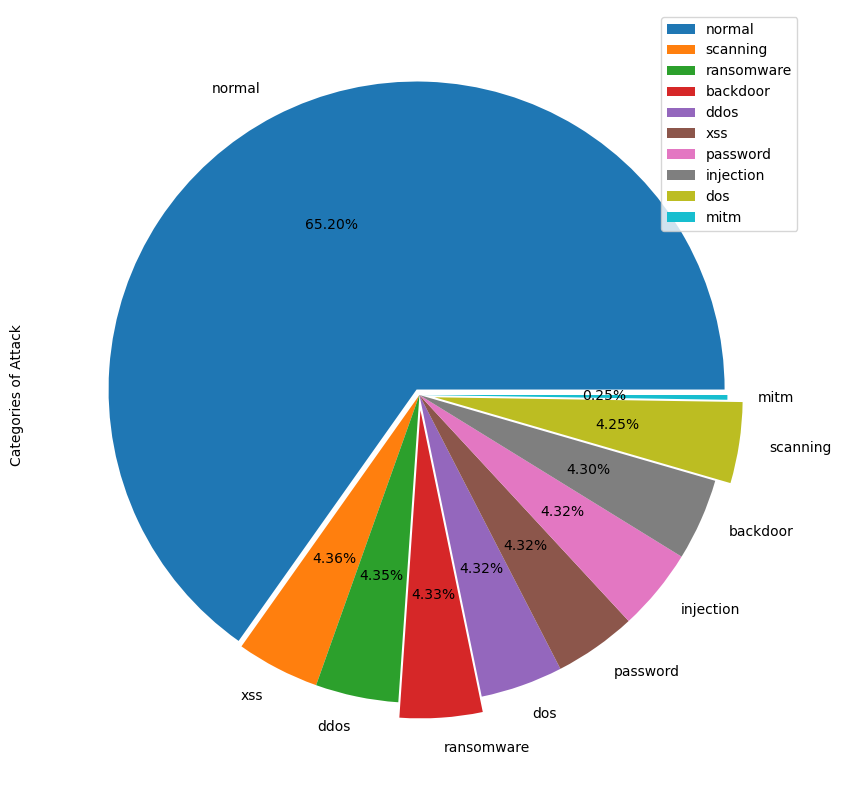

In [7]:
# check the number of unique values in the target variable
print(subset_dataset['type'].value_counts())
subset_dataset['type'].value_counts().plot(kind = 'pie',
                                           explode = [0.02, 0, 0, 0.05, 0, 0,
                                                      0, 0, 0.05, 0],
                                           figsize = (10, 10),
                                           autopct = '%1.2f%%',
                                           shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(['normal', 'scanning', 'ransomware', 'backdoor', 'ddos', 'xss',
            'password', 'injection', 'dos', 'mitm'])
plt.show()

In [8]:
# check the data type of dataframe columns
subset_dataset.dtypes

proto            object
duration        float64
src_bytes         int64
dst_bytes         int64
conn_state       object
missed_bytes      int64
src_pkts          int64
src_ip_bytes      int64
dst_pkts          int64
dst_ip_bytes      int64
dns_qclass        int64
dns_qtype         int64
dns_rcode         int64
type             object
dtype: object

In [9]:
# check for missing values
# subset_dataset[subset_dataset.isnull().any(axis=1)]
subset_dataset.isnull().any(axis=1)

229742    False
147554    False
135280    False
80601     False
325675    False
          ...  
194361    False
99675     False
130146    False
99329     False
358353    False
Length: 100000, dtype: bool

In [10]:
# Split Data into Features and Target variables
X = subset_dataset.iloc[:, :-1].values
y = subset_dataset.type
print(X)
print(y)
print(X.shape)

[['tcp' 60.778143 0 ... 0 0 0]
 ['udp' 4.6e-05 130 ... 1 28 0]
 ['udp' 3.4e-05 130 ... 1 1 0]
 ...
 ['tcp' 0.0 0 ... 0 0 0]
 ['tcp' 0.0 0 ... 0 0 0]
 ['tcp' 79.151874 1495 ... 0 0 0]]
229742         ddos
147554       normal
135280       normal
80601        normal
325675       normal
            ...    
194361    injection
99675        normal
130146       normal
99329        normal
358353          xss
Name: type, Length: 100000, dtype: object
(100000, 13)


# One-Hot Encode Categorical Variables

In [11]:
# Handling Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('enconder', OneHotEncoder(), [0, 4])], remainder='passthrough')
encoded_X = np.array(ct.fit_transform(X))
encoded_X[:,:12]

array([[0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 1.0]], dtype=object)

I'm just checking the new feature names after one hot encoding to ensure that they match. The features are now in this order ['icmp', 'tcp', 'udp', OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH', 'SHR',  'duration', 'src_bytes',	'dst_bytes', 'missed_bytes',	'src_pkts',	'src_ip_bytes',	'dst_pkts',	'dst_ip_bytes',	'dns_qclass',	'dns_qtype',	'dns_rcode']

In [12]:
# view all the numpy array values when printing
# np.set_printoptions(threshold=np.inf)
print(encoded_X[0:5])

# check number of unique values in column proto
print(np.sort(subset_dataset['proto'].unique()))
# check number of unique values in column conn_state
print(np.sort(subset_dataset['conn_state'].unique()))
subset_dataset[0:5]

[[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  60.778143 0 0 0 1 52 2 112 0 0 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 4.6e-05
  130 0 0 2 186 0 0 1 28 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 3.4e-05
  130 0 0 2 186 0 0 1 1 0]
 [0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0
  0 0 0 0 0 0 0 0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.558475 692 29310 0 11 1144 25 30322 0 0 0]]
['icmp' 'tcp' 'udp']
['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'RSTRH' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH'
 'SHR']


,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,type
229742,tcp,60.778143,0,0,S3,0,1,52,2,112,0,0,0,ddos
147554,udp,0.000046,130,0,S0,0,2,186,0,0,1,28,0,normal
135280,udp,0.000034,130,0,S0,0,2,186,0,0,1,1,0,normal
80601,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,normal
325675,tcp,0.558475,692,29310,SF,0,11,1144,25,30322,0,0,0,normal


In [13]:
print(encoded_X.shape)

(100000, 27)


### Label Encode the target variable

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'backdoor': 0, 'ddos': 1, 'dos': 2, 'injection': 3, 'mitm': 4, 'normal': 5, 'password': 6, 'ransomware': 7, 'scanning': 8, 'xss': 9}


In [15]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(encoded_X, encoded_y, test_size=0.25,
                                                  random_state=0,
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_val, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 1 28 0]
 [0.0 0.0 1.0 ... 0 0 0]]
X Validation set
[[0.0 0.0 1.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]
y Training set
[5 1 9 ... 5 5 6]
y Validation set
[5 1 9 ... 5 5 6]


### Feature Scaling

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019  -1.2516929   1.28462848 ... -0.06590738 -0.16843004
  -0.16063665]
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 ...
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019  -1.2516929   1.28462848 ... -0.06590738  0.8079215
  -0.16063665]
 [-0.1115019  -1.2516929   1.28462848 ... -0.06636985 -0.20459121
  -0.16063665]]
[[-0.1115019  -1.2516929   1.28462848 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 ...
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019  -1.2516929   1.28462848 ... -0.06636985 -0.20459121
  -0.16063665]
 [-0.1115019   0.79891801 -0.77843518 ... -0.06636985 -0.20459121
  -0.16063665]]
75000
25000


# Train Nueral Networks

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'normal', 'password', 'ransomware', 'scanning', 'xss']

### Artificial Neural Network

In [17]:
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils

encoded_y_train = to_categorical(y_train)
encoded_y_val = to_categorical(y_val)
encoded_y_train

2023-09-05 11:49:01.113516: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 11:49:01.359223: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 11:49:01.360905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 11:49:02.366130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
import tensorflow as tf
print(tf.__version__)

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.25, batch_size=32, epochs=100)

2.13.0
Epoch 1/100
1758/1758 [==============================] - 5s 2ms/step - loss: 0.8551 - accuracy: 0.7038 - precision: 0.8640 - recall: 0.5621 - val_loss: 0.6755 - val_accuracy: 0.7415 - val_precision: 0.8638 - val_recall: 0.6454
Epoch 2/100
1758/1758 [==============================] - 3s 2ms/step - loss: 0.6454 - accuracy: 0.7620 - precision: 0.8639 - recall: 0.6528 - val_loss: 0.6352 - val_accuracy: 0.7516 - val_precision: 0.8768 - val_recall: 0.6565
Epoch 3/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.6211 - accuracy: 0.7666 - precision: 0.8637 - recall: 0.6677 - val_loss: 0.6203 - val_accuracy: 0.7634 - val_precision: 0.8788 - val_recall: 0.6429
Epoch 4/100
1758/1758 [==============================] - 4s 3ms/step - loss: 0.6081 - accuracy: 0.7692 - precision: 0.8670 - recall: 0.6681 - val_loss: 0.6081 - val_accuracy: 0.7617 - val_precision: 0.8649 - val_recall: 0.6706
Epoch 5/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5994 -

Epoch 37/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5301 - accuracy: 0.7931 - precision: 0.8663 - recall: 0.7208 - val_loss: 0.5300 - val_accuracy: 0.8053 - val_precision: 0.8805 - val_recall: 0.7102
Epoch 38/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5271 - accuracy: 0.7935 - precision: 0.8677 - recall: 0.7197 - val_loss: 0.5254 - val_accuracy: 0.8009 - val_precision: 0.8886 - val_recall: 0.6975
Epoch 39/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.7953 - precision: 0.8686 - recall: 0.7201 - val_loss: 0.5291 - val_accuracy: 0.7867 - val_precision: 0.8817 - val_recall: 0.7109
Epoch 40/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5214 - accuracy: 0.7955 - precision: 0.8685 - recall: 0.7218 - val_loss: 0.5322 - val_accuracy: 0.7986 - val_precision: 0.8596 - val_recall: 0.7324
Epoch 41/100
1758/1758 [==============================] - 4s 2ms/step - loss: 0.5206 - a

Epoch 73/100
1758/1758 [==============================] - 6s 3ms/step - loss: 0.4656 - accuracy: 0.8214 - precision: 0.8865 - recall: 0.7546 - val_loss: 0.4986 - val_accuracy: 0.8045 - val_precision: 0.8668 - val_recall: 0.7410
Epoch 74/100
1758/1758 [==============================] - 6s 3ms/step - loss: 0.4639 - accuracy: 0.8213 - precision: 0.8895 - recall: 0.7522 - val_loss: 0.4594 - val_accuracy: 0.8364 - val_precision: 0.9167 - val_recall: 0.7404
Epoch 75/100
1758/1758 [==============================] - 5s 3ms/step - loss: 0.4626 - accuracy: 0.8220 - precision: 0.8933 - recall: 0.7487 - val_loss: 0.4620 - val_accuracy: 0.8287 - val_precision: 0.8986 - val_recall: 0.7495
Epoch 76/100
1758/1758 [==============================] - 5s 3ms/step - loss: 0.4632 - accuracy: 0.8222 - precision: 0.8910 - recall: 0.7505 - val_loss: 0.4615 - val_accuracy: 0.8154 - val_precision: 0.9060 - val_recall: 0.7554
Epoch 77/100
1758/1758 [==============================] - 5s 3ms/step - loss: 0.4603 - a

In [19]:
ann_y_pred = ann_model.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

782/782 [==============================] - 1s 2ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
# Check the validation accuracy
_, accuracy, precision, recall = ann_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

782/782 [==============================] - 1s 2ms/step - loss: 0.6629 - accuracy: 0.8066 - precision: 0.8366 - recall: 0.7692
Accuracy: 80.66


Text(0.5, 0, 'epoch')

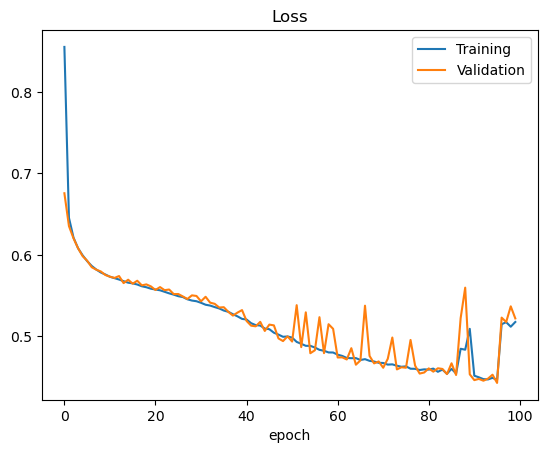

In [21]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

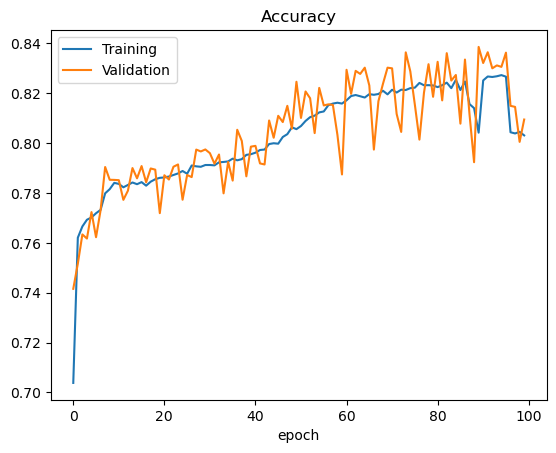

In [22]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

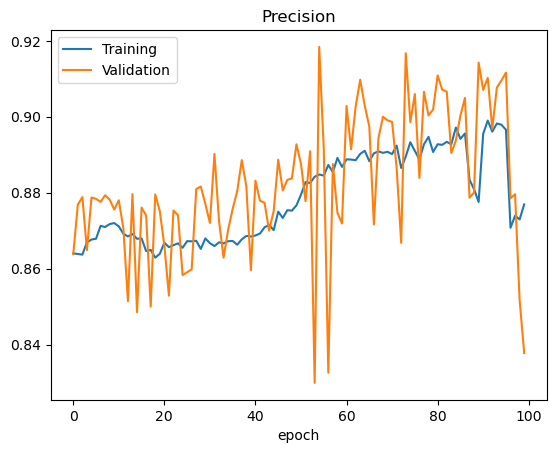

In [23]:
# Plot graph between training and validation precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.legend(['Training', 'Validation'])
plt.title('Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

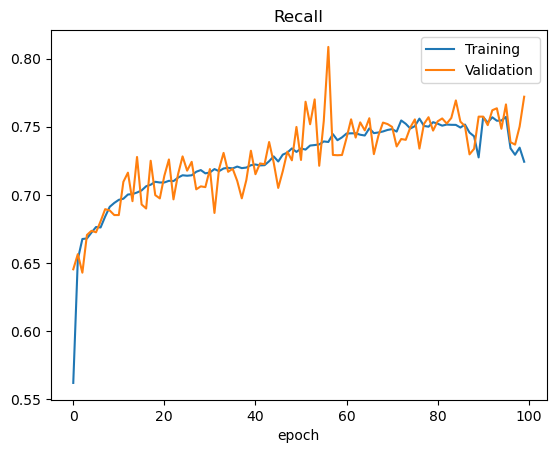

In [24]:
# Plot graph between training and validation recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.legend(['Training', 'Validation'])
plt.title('Recall')
plt.xlabel('epoch')

/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/c4leb/anaconda3/lib/python3.9/site-packag

{'accuracy_score': 0.76956, 'precision_score': 0.5873979378128694, 'recall_score': 0.5006989740183885, 'f1_score': 0.4528108714079009}
              precision    recall  f1-score   support

           0       0.24      1.00      0.39      1075
           1       0.86      0.91      0.89      1088
           2       0.84      0.09      0.16      1081
           3       0.79      0.57      0.66      1079
           4       0.00      0.00      0.00        62
           5       0.92      0.91      0.91     16299
           6       0.00      0.00      0.00      1080
           7       0.88      0.06      0.11      1084
           8       0.71      0.77      0.74      1062
           9       0.63      0.71      0.67      1090

    accuracy                           0.77     25000
   macro avg       0.59      0.50      0.45     25000
weighted avg       0.81      0.77      0.75     25000



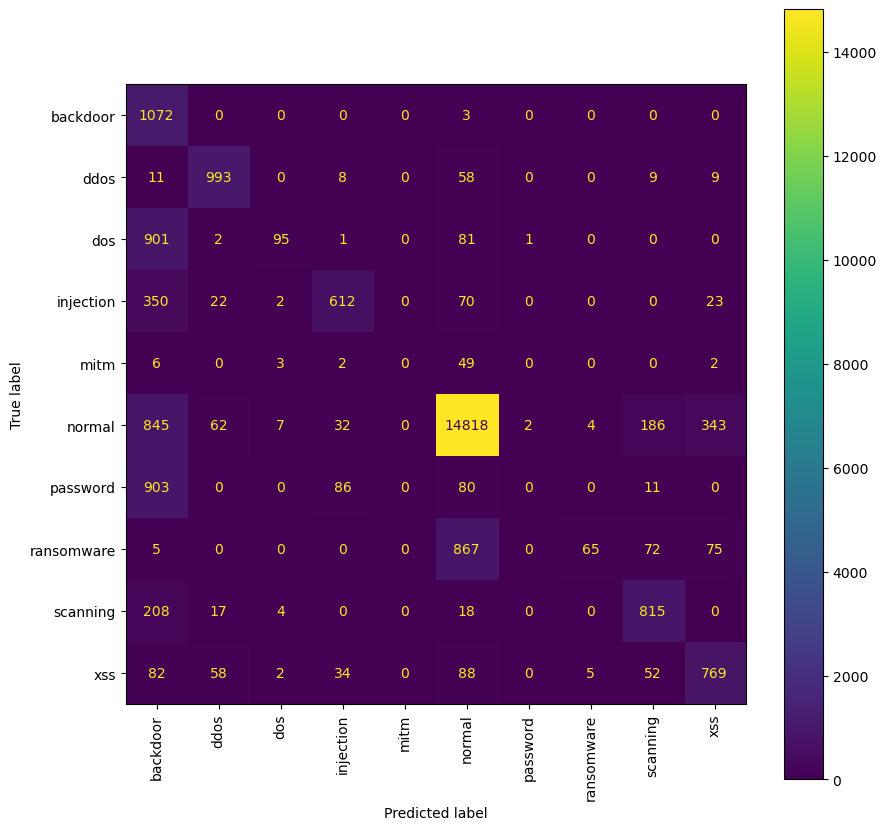

In [27]:
print(evaluate_model(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

# Implementing CNN Model

In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(target_shape=(scaled_X_train.shape[1], 1), input_shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

cnn_history = cnn_model.fit(scaled_X_train, encoded_y_train, validation_data=(scaled_X_val, encoded_y_val), batch_size=32, epochs=200)


Epoch 1/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6752 - accuracy: 0.7475 - precision_1: 0.8324 - recall_1: 0.6587 - val_loss: 0.6431 - val_accuracy: 0.7606 - val_precision_1: 0.8043 - val_recall_1: 0.6798
Epoch 2/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6271 - accuracy: 0.7552 - precision_1: 0.8357 - recall_1: 0.6715 - val_loss: 0.6430 - val_accuracy: 0.7602 - val_precision_1: 0.8513 - val_recall_1: 0.6638
Epoch 3/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6157 - accuracy: 0.7616 - precision_1: 0.8401 - recall_1: 0.6803 - val_loss: 0.6322 - val_accuracy: 0.7555 - val_precision_1: 0.8327 - val_recall_1: 0.6777
Epoch 4/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6067 - accuracy: 0.7687 - precision_1: 0.8481 - recall_1: 0.6866 - val_loss: 0.6276 - val_accuracy: 0.7701 - val_precision_1: 0.8509 - val_recall_1: 0.6709
Epoch 5/200
2344/2344 [==============================] - 7s 

Epoch 36/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.4988 - accuracy: 0.7988 - precision_1: 0.8768 - recall_1: 0.7233 - val_loss: 0.7396 - val_accuracy: 0.6503 - val_precision_1: 0.7138 - val_recall_1: 0.5645
Epoch 37/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4967 - accuracy: 0.7992 - precision_1: 0.8780 - recall_1: 0.7262 - val_loss: 0.6330 - val_accuracy: 0.8086 - val_precision_1: 0.9156 - val_recall_1: 0.7365
Epoch 38/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4909 - accuracy: 0.8044 - precision_1: 0.8806 - recall_1: 0.7311 - val_loss: 0.6425 - val_accuracy: 0.8139 - val_precision_1: 0.9093 - val_recall_1: 0.7199
Epoch 39/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4843 - accuracy: 0.8054 - precision_1: 0.8813 - recall_1: 0.7329 - val_loss: 0.6483 - val_accuracy: 0.8251 - val_precision_1: 0.9160 - val_recall_1: 0.7332
Epoch 40/200
2344/2344 [==============================] 

Epoch 71/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4220 - accuracy: 0.8320 - precision_1: 0.8908 - recall_1: 0.7720 - val_loss: 0.7447 - val_accuracy: 0.8258 - val_precision_1: 0.8770 - val_recall_1: 0.7697
Epoch 72/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4219 - accuracy: 0.8325 - precision_1: 0.8912 - recall_1: 0.7704 - val_loss: 0.7340 - val_accuracy: 0.8388 - val_precision_1: 0.9010 - val_recall_1: 0.7646
Epoch 73/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4237 - accuracy: 0.8326 - precision_1: 0.8911 - recall_1: 0.7720 - val_loss: 0.7343 - val_accuracy: 0.8396 - val_precision_1: 0.9019 - val_recall_1: 0.7622
Epoch 74/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.4202 - accuracy: 0.8351 - precision_1: 0.8936 - recall_1: 0.7722 - val_loss: 0.7383 - val_accuracy: 0.8462 - val_precision_1: 0.9029 - val_recall_1: 0.7856
Epoch 75/200
2344/2344 [==============================] 

Epoch 106/200
2344/2344 [==============================] - 7s 3ms/step - loss: 0.3998 - accuracy: 0.8429 - precision_1: 0.9003 - recall_1: 0.7819 - val_loss: 0.8234 - val_accuracy: 0.8581 - val_precision_1: 0.9184 - val_recall_1: 0.7886
Epoch 107/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.3996 - accuracy: 0.8415 - precision_1: 0.8972 - recall_1: 0.7844 - val_loss: 0.8143 - val_accuracy: 0.8597 - val_precision_1: 0.9147 - val_recall_1: 0.8013
Epoch 108/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.4032 - accuracy: 0.8412 - precision_1: 0.8930 - recall_1: 0.7875 - val_loss: 0.8101 - val_accuracy: 0.8394 - val_precision_1: 0.9138 - val_recall_1: 0.7592
Epoch 109/200
2344/2344 [==============================] - 8s 3ms/step - loss: 0.3976 - accuracy: 0.8415 - precision_1: 0.8957 - recall_1: 0.7875 - val_loss: 0.8020 - val_accuracy: 0.8481 - val_precision_1: 0.9074 - val_recall_1: 0.7908
Epoch 110/200
2344/2344 [===========================

Epoch 175/200
2344/2344 [==============================] - 9s 4ms/step - loss: 0.3912 - accuracy: 0.8471 - precision_1: 0.8925 - recall_1: 0.7951 - val_loss: 1.0803 - val_accuracy: 0.8566 - val_precision_1: 0.9131 - val_recall_1: 0.7896
Epoch 176/200
2344/2344 [==============================] - 8s 4ms/step - loss: 0.3923 - accuracy: 0.8473 - precision_1: 0.8912 - recall_1: 0.7971 - val_loss: 1.0814 - val_accuracy: 0.8581 - val_precision_1: 0.9169 - val_recall_1: 0.7954
Epoch 177/200
2344/2344 [==============================] - 9s 4ms/step - loss: 0.3910 - accuracy: 0.8479 - precision_1: 0.8930 - recall_1: 0.7979 - val_loss: 1.0927 - val_accuracy: 0.8476 - val_precision_1: 0.8659 - val_recall_1: 0.8355
Epoch 178/200
2344/2344 [==============================] - 8s 4ms/step - loss: 0.3904 - accuracy: 0.8473 - precision_1: 0.8924 - recall_1: 0.7970 - val_loss: 1.0888 - val_accuracy: 0.8559 - val_precision_1: 0.9067 - val_recall_1: 0.7948
Epoch 179/200
2344/2344 [===========================

In [42]:
cnn_y_pred = cnn_model.predict(scaled_X_val)
cnn_y_pred = (cnn_y_pred > 0.5)
cnn_y_pred

782/782 [==============================] - 1s 1ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
# Check the validation accuracy
_, accuracy, precision, recall = cnn_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

782/782 [==============================] - 1s 2ms/step - loss: 1.1114 - accuracy: 0.8615 - precision_1: 0.8680 - recall_1: 0.8527
Accuracy: 86.15


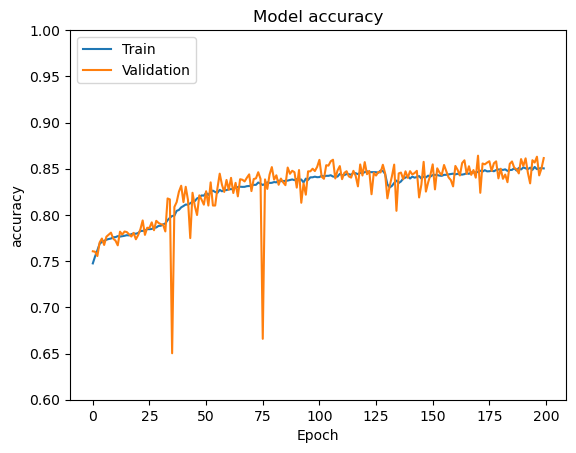

In [29]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.ylim([0.6,1])  # Set the limits of y-axis here
    plt.show()

plot_metrics(cnn_history, 'accuracy')

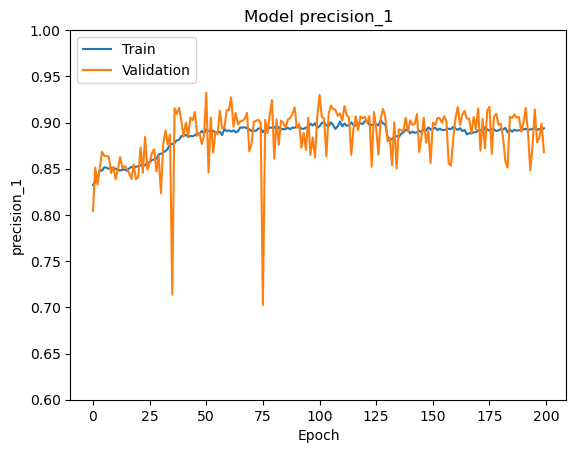

In [31]:
plot_metrics(cnn_history, 'precision_1')

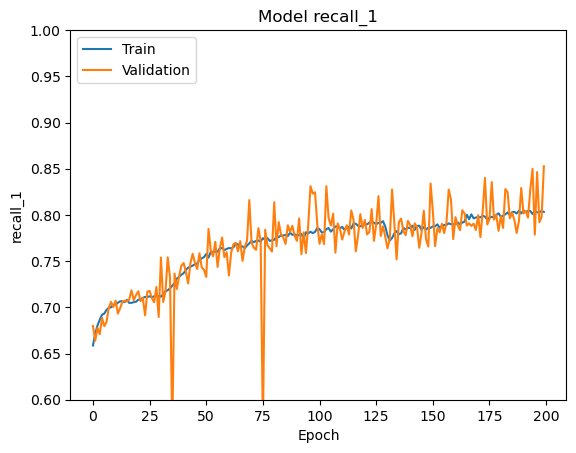

In [32]:
plot_metrics(cnn_history, 'recall_1')

{'accuracy_score': 0.85272, 'precision_score': 0.7528205919231289, 'recall_score': 0.6825236828208165, 'f1_score': 0.6677255123469457}
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      1075
           1       0.81      0.91      0.86      1088
           2       0.81      0.21      0.33      1081
           3       0.82      0.54      0.66      1079
           4       0.56      0.24      0.34        62
           5       0.96      0.93      0.95     16299
           6       0.98      0.47      0.64      1080
           7       0.80      0.90      0.84      1084
           8       0.72      0.77      0.74      1062
           9       0.67      0.85      0.75      1090

    accuracy                           0.85     25000
   macro avg       0.75      0.68      0.67     25000
weighted avg       0.89      0.85      0.85     25000



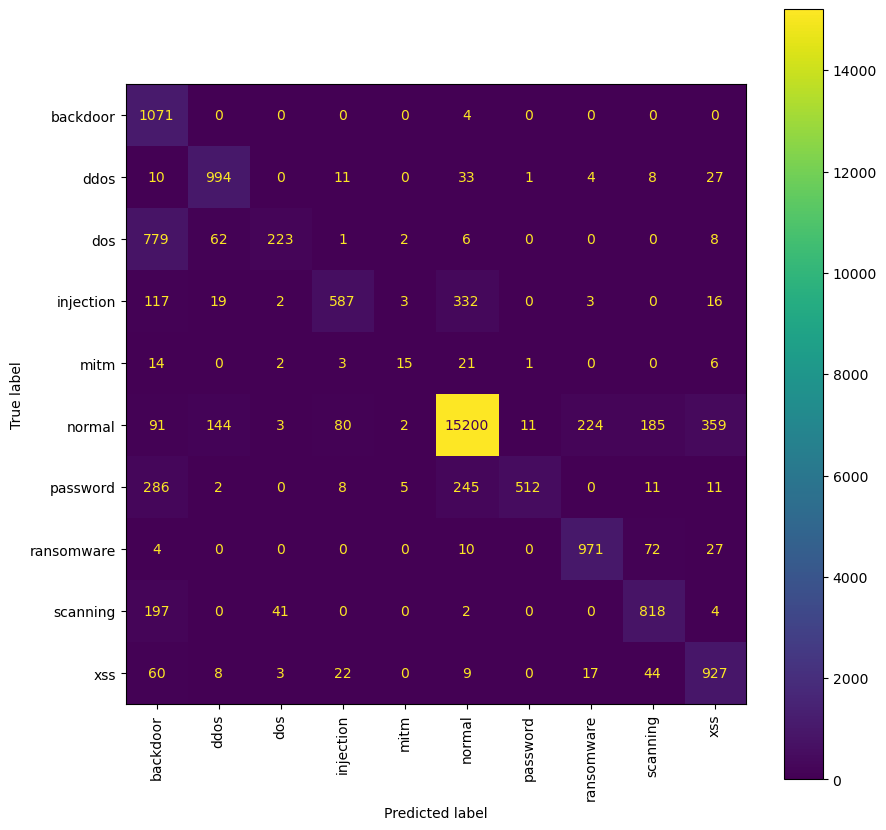

In [44]:
print(evaluate_model(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1), label)

# Implementing RNN Model

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM


rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(target_shape=(scaled_X_train.shape[1], 1), input_shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

rnn_history = rnn_model.fit(scaled_X_train, encoded_y_train, validation_data=(scaled_X_val, encoded_y_val), batch_size=32, epochs=2)


Epoch 1/2
2344/2344 [==============================] - 30s 12ms/step - loss: 0.7861 - accuracy: 0.7278 - precision_5: 0.8120 - recall_5: 0.6339 - val_loss: 0.7095 - val_accuracy: 0.7512 - val_precision_5: 0.8181 - val_recall_5: 0.6678
Epoch 2/2
2344/2344 [==============================] - 33s 14ms/step - loss: 0.6487 - accuracy: 0.7519 - precision_5: 0.8391 - recall_5: 0.6500 - val_loss: 0.6271 - val_accuracy: 0.7559 - val_precision_5: 0.7588 - val_recall_5: 0.7512


In [39]:
rnn_y_pred = rnn_model.predict(scaled_X_val)
rnn_y_pred = (rnn_y_pred > 0.5)
rnn_y_pred

782/782 [==============================] - 3s 4ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [40]:
# Check the validation accuracy
_, accuracy, precision, recall = rnn_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

782/782 [==============================] - 3s 4ms/step - loss: 0.2762 - accuracy: 0.8958 - precision_2: 0.9363 - recall_2: 0.8494
Accuracy: 89.58


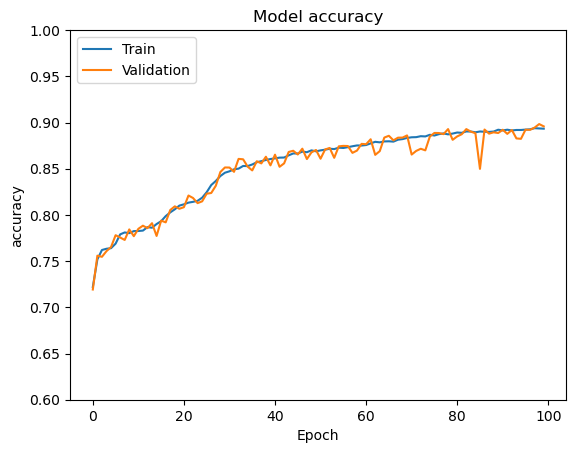

In [35]:
plot_metrics(rnn_history, 'accuracy')

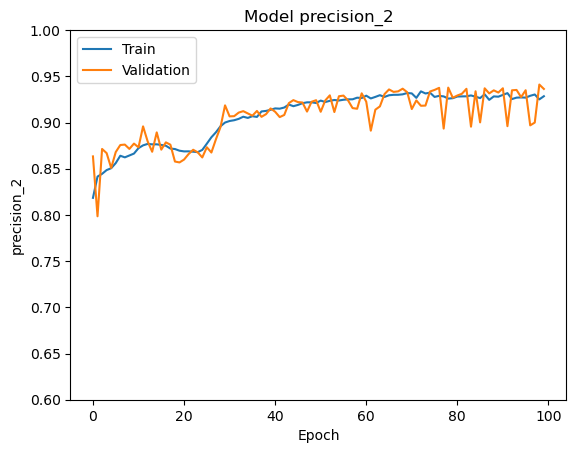

In [37]:
plot_metrics(rnn_history, 'precision_2')

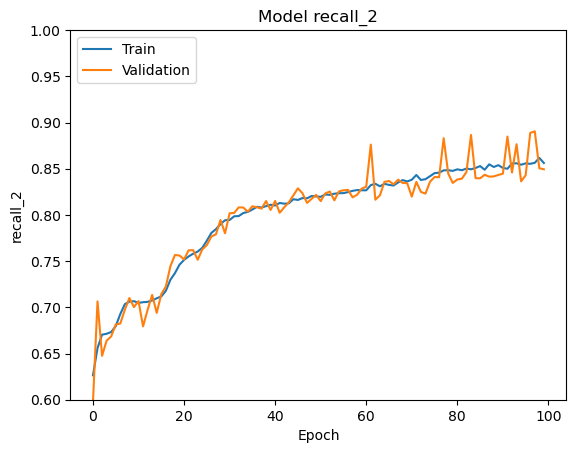

In [38]:
plot_metrics(rnn_history, 'recall_2')

{'accuracy_score': 0.89192, 'precision_score': 0.8022413575181865, 'recall_score': 0.7699644031162662, 'f1_score': 0.7462384215591109}
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1075
           1       0.93      0.90      0.91      1088
           2       0.94      0.19      0.32      1081
           3       0.98      0.90      0.94      1079
           4       0.54      0.42      0.47        62
           5       0.98      0.95      0.96     16299
           6       0.98      0.70      0.82      1080
           7       0.82      0.89      0.85      1084
           8       0.73      0.88      0.80      1062
           9       0.67      0.87      0.76      1090

    accuracy                           0.89     25000
   macro avg       0.80      0.77      0.75     25000
weighted avg       0.92      0.89      0.89     25000



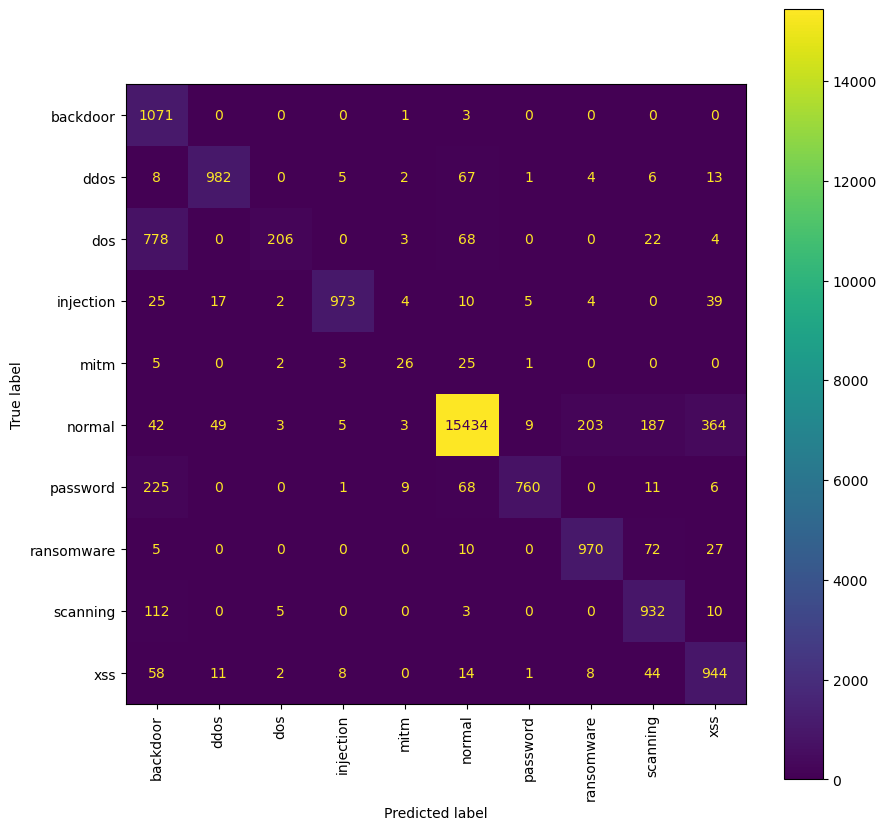

In [41]:
print(evaluate_model(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1), label)